In [39]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3002,ham,I will see in half an hour
258,spam,We tried to contact you re your reply to our o...
2566,ham,You in your room? I need a few
3698,ham,How i noe... Did Ì_ specify da domain as nusst...
4033,ham,Wot u up 2? Thout u were gonna call me!! Txt b...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [116]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [29]:
df.duplicated().sum()

403

In [13]:
df = df.drop_duplicates(keep='first')

In [33]:
df.duplicated().sum()

0

EDA

In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

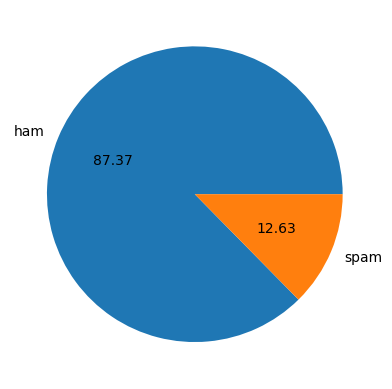

In [15]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [17]:
import nltk

In [21]:
!pip install nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\HP
[nltk_data]     LAPTOP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
df['num_characters'] = df['text'].apply(len)

In [21]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

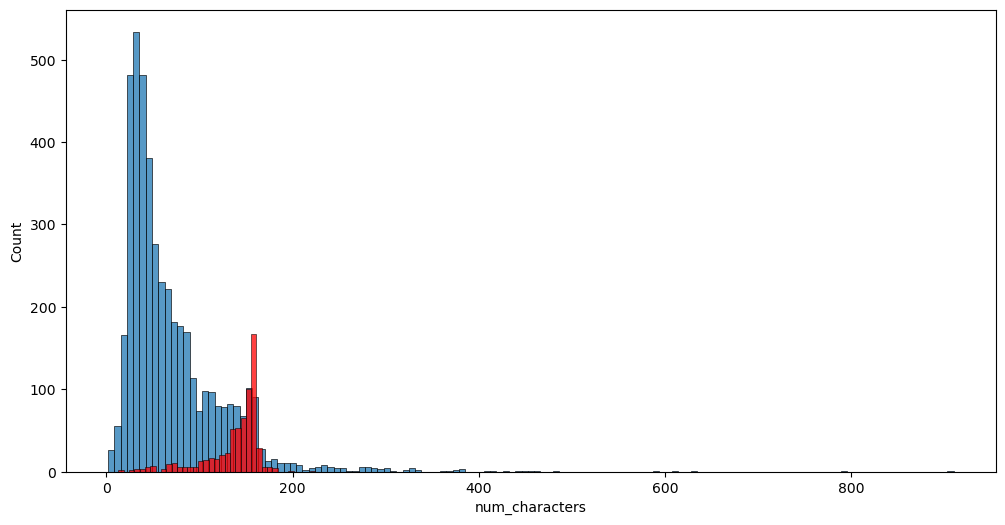

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

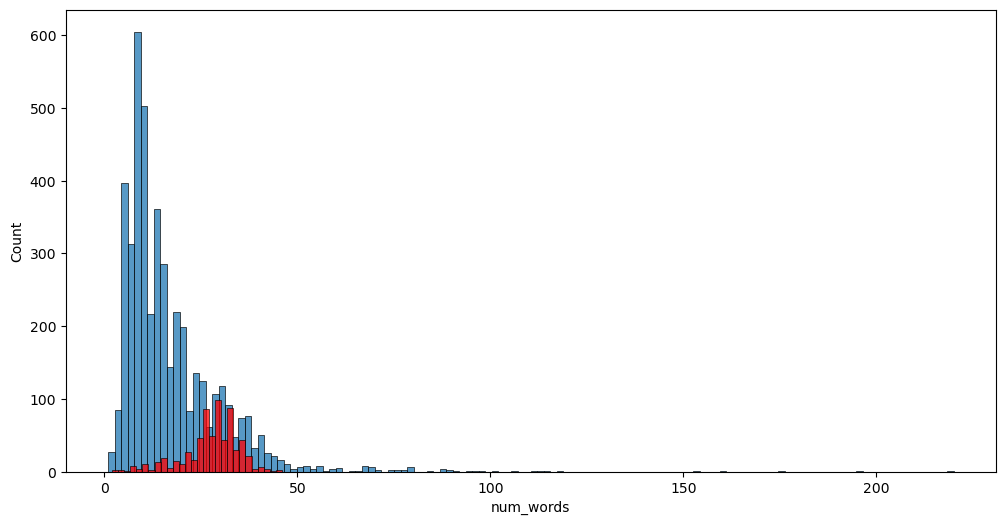

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

Data Preprocessing

In [27]:
from nltk.corpus import stopwords
import string
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [29]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [31]:
df['transformed_text'] = df['text'].apply(transform_text)
df['transformed_text']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: transformed_text, Length: 5169, dtype: object

In [75]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\HP
[nltk_data]     LAPTOP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [33]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
      spam_corpus.append(word)

In [35]:
len(spam_corpus)

9939

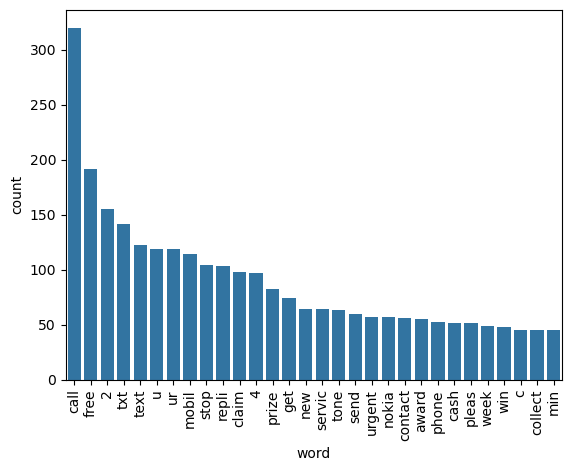

In [41]:
from collections import Counter

word_counts = Counter(spam_corpus).most_common(30)


df_word_counts = pd.DataFrame(word_counts, columns=['word', 'count'])


sns.barplot(x='word', y='count', data=df_word_counts)
plt.xticks(rotation='vertical')
plt.show()


In [43]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
      ham_corpus.append(word)

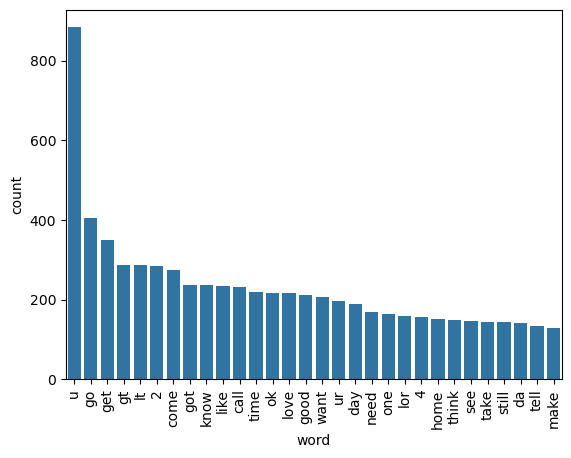

In [60]:
from collections import Counter

word_count= Counter(ham_corpus).most_common(30)
df_word_count=pd.DataFrame(word_count,columns=['word','count'])
sns.barplot(x='word',y='count',data=df_word_count)
plt.xticks(rotation='vertical')
plt.show()

Model Building

In [45]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tf=TfidfVectorizer()

In [45]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tf=TfidfVectorizer()

In [47]:
X=tf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 6708)

In [49]:
Y=df['target'].values


In [51]:
from sklearn.model_selection import train_test_split

In [53]:

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [55]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [59]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [78]:
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [61]:
mnb.fit(X_train,y_train)
y_pred1=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [80]:
bnb.fit(X_train,y_train)
y_pred1=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

In [84]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [86]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    
}

In [88]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [90]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [ ]:
df_performance=pd.DataFrame({'Algorithm':clfs.keys(),'Precision':precision_scores,'Accuracy':accuracy_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

In [ ]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
new_df=pd.DataFrame({'Algorithm': clf.keys(),'Precision_max_feet_3000':precision_scores,'Accuracy_max_feet_3000':accuracy_scores}).sort_values('Precision_max_feet_3000',ascending=False)

In [ ]:
new_df=performance_df.merge(new_df,on="ALgorithm")

In [ ]:
scaled_df=pd.DataFrame({'Algorithm': clf.keys(),'Precision_Scaling':precision_scores,'Accuracy_Scaling':accuracy_scores}).sort_values('Precision_Scaling',ascending=False)

In [ ]:
scaled_df=new_df.merge(scaled_df,on="ALgorithm")

In [ ]:
char_df=pd.DataFrame({'Algorithm': clf.keys(),'Precision_Scaling':precision_scores,'Accuracy_Scaling':accuracy_scores}).sort_values('Precision_Scaling',ascending=False)

In [ ]:
char_df=new_df.merge(char_df,on="ALgorithm")

In [149]:
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

In [109]:
from sklearn.ensemble import VotingClassifier

In [151]:
voting=VotingClassifier(estimators=[('sv',svc),('nb',mnb),('et',etc)],voting='soft')


In [145]:
# def trainClassifier(clf,X_train,y_train,X_test,y_test):
#   clf.fit(X_train,y_train)   
#   y_pred=clf.predict(X_test)
#   accuracy_score(y_test,y_pred)
#   precision_score(y_test,y_pred)
#   return accuracy_score,precision_score  

In [191]:
parameters=[('sv',svc),('nb',mnb),('et',etc)]
final_test=RandomForestClassifier()

In [192]:
clf=StackingClassifier(estimators=parameters,final_estimator=final_test)

In [188]:
train_classifier(voting,X_train,y_train,X_test,y_test)

(0.9787234042553191, 1.0)

In [193]:
train_classifier(clf,X_train,y_train,X_test,y_test)

(0.9806576402321083, 0.9538461538461539)

In [63]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

SyntaxError: invalid syntax (1879894980.py, line 1)